## Przygotowanie Środowiska Python dla obliczeń kwatnowych


```bash
python3 -m venv venv
source venv/bin/activate
# Scripts\Activate

pip install qiskit==0.44.1
pip install qiskit[visualization]
# pip install 'qiskit[visualization]'
pip install qiskit_aer==0.12.2
pip install qiskit_machine_learning==0.6.1
pip install qiskit-finance==0.3.4
pip install qiskit-ibmq-provider==0.20.2
pip install qiskit-ignis==0.7.1
```

In [ ]:
from qiskit import  __qiskit_version__
print(__qiskit_version__)

import qiskit.tools.jupyter

%qiskit_version_table

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

In [2]:
qreq = QuantumRegister(4)

In [3]:
creg = ClassicalRegister(4)

In [4]:
circuit = QuantumCircuit(qreq, creg)

In [5]:
circuit.draw()

q0_0: 
      
q0_1: 
      
q0_2: 
      
q0_3: 
      
c0: 4/

In [6]:
output = QuantumRegister(1)

In [7]:
circuit2 = QuantumCircuit(qreq, output, creg)

In [8]:
circuit2.draw()

q0_0: 
      
q0_1: 
      
q0_2: 
      
q0_3: 
      
  q1: 
      
c0: 4/

In [9]:
circuit3 = QuantumCircuit(qreq)

In [10]:
circuit3.draw()

q0_0: 
      
q0_1: 
      
q0_2: 
      
q0_3:

In [11]:
circuit4 = QuantumCircuit(3,3)
circuit4.draw()

q_0: 
     
q_1: 
     
q_2: 
     
c: 3/

# Tworzenie stanu jednokubitowego 


$$\ket{\psi}=\ket{0}$$

In [12]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute

In [13]:
qr = QuantumRegister(1)
qc = QuantumCircuit(qr)

# klasyczny symulator pozwala zobaczyc stan
backend = Aer.get_backend('statevector_simulator')
job=execute(qc, backend)
result = job.result()
result.get_statevector()

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


$$\ket{000}, \ket{001}, \ket{010}, \ket{011}, \ket{100}, \ket{101}, \ket{110}, \ket{111}$$

In [14]:
qr = QuantumRegister(3)
qc = QuantumCircuit(qr)
# qc.x(qr[0]) 
# qc.x(qr[1])

# klasyczny symulator pozwala zobaczyc stan
backend = Aer.get_backend('statevector_simulator')
job=execute(qc, backend)
result = job.result()
result.get_statevector()

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


In [ ]:
Aer.backends()

In [ ]:
# operacje na kubitach - Bramki

In [15]:
from qiskit import QuantumCircuit, execute, Aer, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram, plot_bloch_multivector

### X gate 

The X-gate is represented by the Pauli-X matrix: 

$X = \begin{pmatrix}
0 & 1 \\
1 & 0 \\
\end{pmatrix}$

An X gate equates to a rotation around the X-axis of the Bloch sphere by $\pi$ radians. It maps $|0\rangle$ to $|1\rangle$ and $|1\rangle$ to $|0\rangle$. It is the quantum equivalent of the NOT gate for classical computers and is sometimes called a bit-flip.

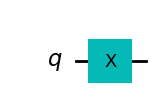

In [16]:
x_gate=QuantumCircuit(1) # Create a quantum circuit with 1 qubit
x_gate.x(0)
x_gate.draw(output='mpl')

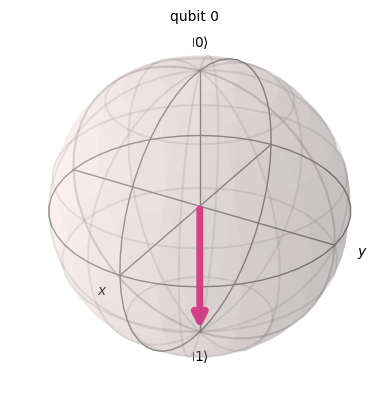

In [17]:
backend = Aer.get_backend('statevector_simulator')
result = execute(x_gate, backend).result().get_statevector()
plot_bloch_multivector(result)

### SX gate

The SX gate equates to a rotation around the X-axis of the Bloch sphere by $\pi/2$. It is called SX gate to indicate that it is the square-root of the X gate. Applying this gate twice produces the standard Pauli-X gate. The opposite of the SX is the SX dagger, which is a rotation by $\pi/2$ in the opposite direction.

$SX = \frac{1}{2}\begin{pmatrix}
1+i & 1-i \\
1-i & 1+i \\
\end{pmatrix}$

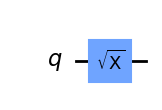

In [18]:
sx_gate = QuantumCircuit(1)
sx_gate.sx(0)  
sx_gate.draw(output='mpl')

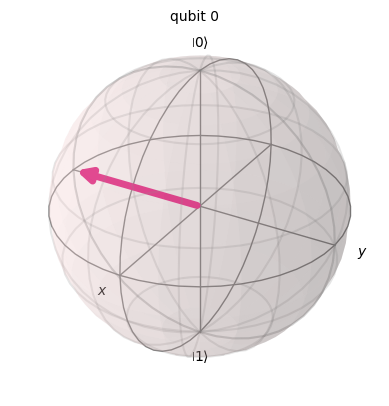

In [19]:
backend = Aer.get_backend('statevector_simulator')
result = execute(sx_gate, backend).result().get_statevector()
plot_bloch_multivector(result)

### RZ gate

The Rz gate performs a rotation of $\phi$ around the Z-axis direction (Where $\phi$ is a real number). It has the matrix below:

$RZ = \begin{pmatrix}
1 & 0 \\
0 & e ^{i \phi } \\
\end{pmatrix}$

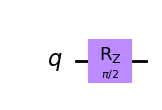

In [20]:
import numpy as np
pi = np.pi
rz_gate = QuantumCircuit(1)
rz_gate.rz(pi/2, 0)
rz_gate.draw(output='mpl')

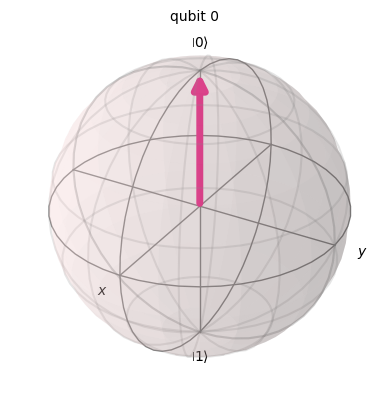

In [21]:
backend = Aer.get_backend('statevector_simulator')
result = execute(rz_gate, backend).result().get_statevector()
plot_bloch_multivector(result)

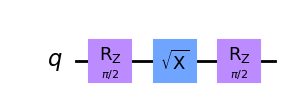

In [15]:
rz_gate.sx(0)
rz_gate.rz(pi/2, 0)
rz_gate.draw(output='mpl')

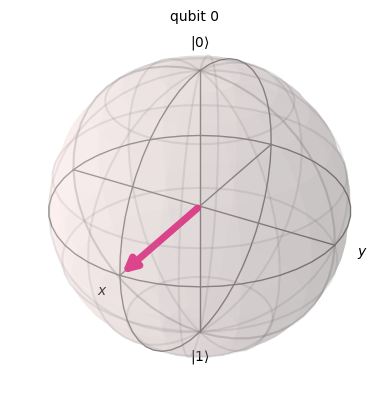

In [16]:
backend = Aer.get_backend('statevector_simulator')
result = execute(rz_gate, backend).result().get_statevector()
plot_bloch_multivector(result)

### Hadamard gate
A Hadamard gate represents a rotation of $\pi$ about the axis that is in the middle of the X-axis and Z-axis.
It maps the basis state $|0\rangle$ to $\frac{|0\rangle + |1\rangle}{\sqrt{2}}$, which means that a measurement will have equal probabilities of being `1` or `0`, creating a 'superposition' of states. This state is also written as $|+\rangle$. What the Hadamard does is to transform between the $|0\rangle$ $|1\rangle$ and the $|+\rangle$ $|-\rangle$ base. 

$H = \frac{1}{\sqrt{2}}\begin{pmatrix}
1 & 1 \\
1 & -1 \\
\end{pmatrix}$

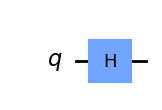

In [17]:
h_gate = QuantumCircuit(1)
h_gate.h(0)
h_gate.draw(output='mpl')

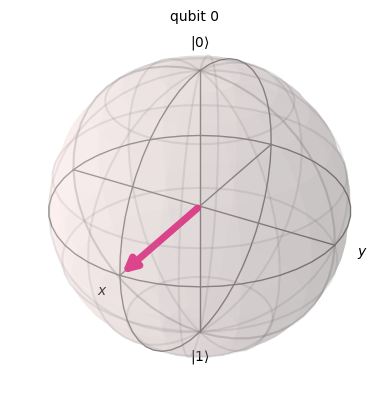

In [18]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
result = execute(h_gate, backend).result().get_statevector()
plot_bloch_multivector(result)

### CX gate (CNOT gate)

The controlled NOT (or CNOT or CX) gate acts on two qubits. It performs the NOT operation (equivalent to applying an X gate) on the second qubit only when the first qubit is $|1\rangle$ and otherwise leaves it unchanged. 

Note: Qiskit numbers the bits in a string from right to left.

$CX = \begin{pmatrix}
1 & 0 & 0 & 0  \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
\end{pmatrix}$

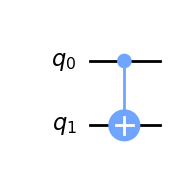

In [19]:
cx_gate = QuantumCircuit(2)
cx_gate.cx(0,1)
cx_gate.draw(output='mpl')

### CCX gate (Toffoli gate)

The CCX gate (controlled controlled X Gate) is also called a Toffoli gate. The CCX gate is a three-bit gate, with two controls and one target as their input and output. If the first two bits are in the state $|1\rangle$, it applies a Pauli-X (or NOT) on the third bit. Otherwise, it does nothing. 

Note: Qiskit numbers the bits in a string from right to left.

$CCX = \begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
\end{pmatrix}$

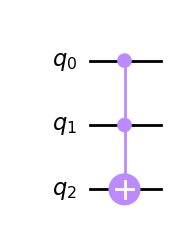

In [20]:
ccx_gate = QuantumCircuit(3)
ccx_gate.ccx(0,1,2)
ccx_gate.draw(output='mpl')

>  Zadanie - zbuduj obwod kwantowy złożony z 10 kubitów, zastosuj bramkę H do kubitu 0 i 9 bramek CNOT gdzie kubitem kontrolnym jest kubit 0 a targety to kubity od 1 do 9 

Przydatne dla obwodów

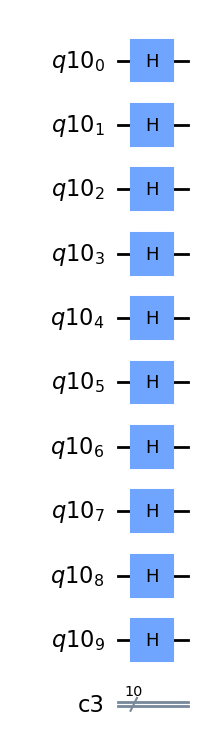

In [28]:
q = QuantumRegister(10)
c = ClassicalRegister(10)
ci = QuantumCircuit(q,c)
ci.h(q)
ci.draw()

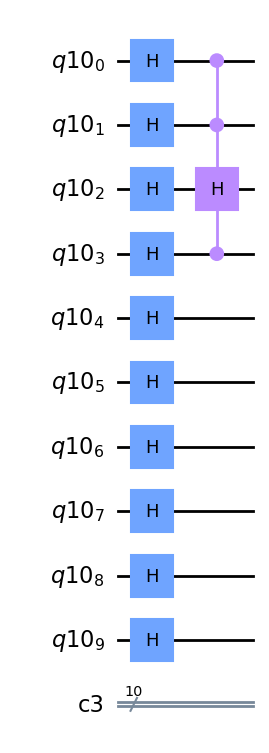

In [29]:
# CCCH gate
from qiskit.circuit.library.standard_gates import HGate

CCCH = HGate().control(3)

ci.append(CCCH, [0,1,3,2])
ci.draw()

## Running cicuits

In [30]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

qreg = QuantumRegister(2)
creg = ClassicalRegister(2)

circuit = QuantumCircuit(qreg, creg)

circuit.h(qreg[0])

circuit.measure(qreg, creg)

In [32]:
from qiskit import execute, Aer

simulator = Aer.get_backend('qasm_simulator')

job = execute(circuit, simulator, shots = 1000)

counts = job.result().get_counts(circuit)
print(counts)

{'00': 504, '01': 496}


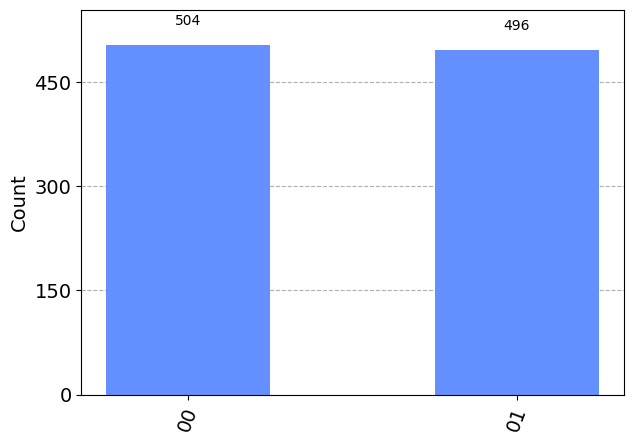

In [33]:
plot_histogram(counts)

## Create logical gates with the help of quantum gates

### NOT gate

The NOT gate flips the value of a bit and, as was mentioned before, an X gate can be considered a NOT gate. The truth table for a NOT gate looks like this:

| Input | Output |
| --- | --- | 
| 1 | 0 |
| 0 | 1 |

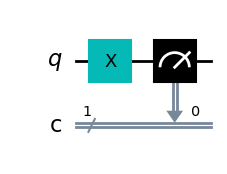

In [21]:
not_gate=QuantumCircuit(1,1) # Create a quantum circuit with 1 qubit and 1 classical bit
not_gate.x(0)
not_gate.measure(0,0)
not_gate.draw(output='mpl')

### AND gate

The output of an AND is true if and only if both inputs are true. The truth table for an AND Gate looks like this:

| A (Input) | B (Input) | Output |
| --- | --- | --- |
| 0 | 0 | 0 | 
| 0 | 1 | 0 |
| 1 | 0 | 0 |
| 1 | 1 | 1 |

With a Toffoli gate, we can get the result of an AND gate by interpreting the two control bits as the input bits and the target bit as the output bit.

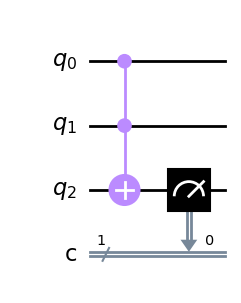

In [22]:
and_gate=QuantumCircuit(3,1) # Create a quantum circuit with 3 qubits and 1 classical bit
and_gate.ccx(0,1,2)
and_gate.measure(2,0)
and_gate.draw(output='mpl')

### OR gate

An OR gate returns true if at least one of the input gates is true.
The truth table for an OR Gate looks like this:

| A (Input) | B (Input) | Output |
| --- | --- | --- |
| 0 | 0 | 0 | 
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 1 |

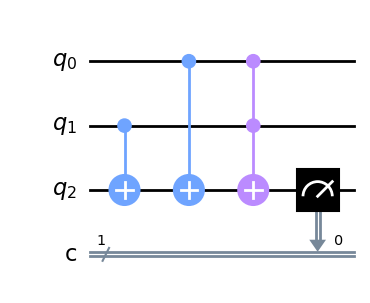

In [23]:
or_gate=QuantumCircuit(3,1) # Create a quantum circuit with 3 qubits and 1 classical bit
or_gate.cx(1,2)
or_gate.cx(0,2)
or_gate.ccx(0,1,2)
or_gate.measure(2,0)
or_gate.draw(output='mpl')